In [1]:
# Import all necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
precision_score,
accuracy_score,
recall_score,
f1_score)
from sklearn.metrics import confusion_matrix, classification_report

# import warning filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# load the dataset

hq = pd.read_csv("who_data.csv")

### Data Exploratory

In [4]:
# Display the head
hq.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# To check the few rows

hq.sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
32135,48,Private,175070,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,2258,40,United-States,>50K
29466,64,Private,59829,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,25,France,<=50K
2796,47,Self-emp-inc,139268,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,60,United-States,>50K
29275,36,Private,201117,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
29436,18,?,25837,11th,7,Never-married,?,Own-child,White,Male,0,0,72,United-States,<=50K


In [6]:
# check for duplicates
hq.duplicated().sum()

24

In [7]:
# display duplicates

duplicates = hq.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool


In [8]:
duplicate_rows = hq[hq.duplicated()]
print(duplicate_rows)

       age          workclass  fnlwgt      education  education_no_of_years  \
4881    25            Private  308144      Bachelors                     13   
5104    90            Private   52386   Some-college                     10   
9171    21            Private  250051   Some-college                     10   
11631   20            Private  107658   Some-college                     10   
13084   25            Private  195994        1st-4th                      2   
15059   21            Private  243368      Preschool                      1   
17040   46            Private  173243        HS-grad                      9   
18555   30            Private  144593        HS-grad                      9   
18698   19            Private   97261        HS-grad                      9   
21318   19            Private  138153   Some-college                     10   
21490   19            Private  146679   Some-college                     10   
21875   49            Private   31267        7th-8th

In [9]:
# Let remove the duplicates

hq = hq.drop_duplicates()

hq = hq.reset_index(drop=True)

In [10]:
hq.duplicated().sum()

0

In [11]:
# check the dimension
hq.shape

(32537, 15)

In [12]:
# To check the datatpye
hq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
dtypes:

In [13]:
# Check the missing value
hq.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [14]:
hq.salary

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32532     <=50K
32533      >50K
32534     <=50K
32535     <=50K
32536      >50K
Name: salary, Length: 32537, dtype: object

In [15]:
hq[hq['salary'] <= '50K']['salary'].value_counts()

 <=50K    24698
 >50K      7839
Name: salary, dtype: int64

In [16]:
hq[hq['salary'] > '50K']['salary'].value_counts()

Series([], Name: salary, dtype: int64)

In [17]:
salary_gt_50k = hq[hq['salary'] > '50K']['salary']
salary_gt_50k

Series([], Name: salary, dtype: object)

In [18]:
salary2_gt_50k = hq[hq['salary']  <= '50K']['salary']
salary2_gt_50k

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32532     <=50K
32533      >50K
32534     <=50K
32535     <=50K
32536      >50K
Name: salary, Length: 32537, dtype: object

In [19]:
# display some descriptive statistics of data
hq.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
# To select only the features that are object datatype and observe

cat_hq = hq.select_dtypes(include = "object")
cat_hq.describe()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,salary
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [21]:
# print all the categories with their counts

for colm in cat_hq:
    print(hq[colm].value_counts())
    print("?" * 100)

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
????????????????????????????????????????????????????????????????????????????????????????????????????
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64
????????????????????????????????????????????????????????????????????????????????????????????????????
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025

## DATA CLEANING

### Workclass

In [22]:
hq["workclass"].describe()

count        32537
unique           9
top        Private
freq         22673
Name: workclass, dtype: object

In [23]:
hq.workclass.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [24]:
hq.workclass.replace(" ?", np.nan, inplace = True)

### occupation

In [25]:
hq.occupation.value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [26]:
hq.occupation.replace(" ?", np.nan, inplace = True)

### native_country 

In [27]:
hq.native_country.value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [28]:
hq.native_country.replace(" ?", np.nan, inplace = True)

In [29]:
# recheck the missing value

hq.isnull().sum()

age                          0
workclass                 1836
fnlwgt                       0
education                    0
education_no_of_years        0
marital_status               0
occupation                1843
relationship                 0
race                         0
sex                          0
capital_gain                 0
capital_loss                 0
working_hours_per_week       0
native_country             582
salary                       0
dtype: int64

### Imputing all the NAN values with zero

In [30]:
hq["workclass"].fillna(0, inplace = True)
hq["occupation"].fillna(0, inplace = True)
hq["native_country"].fillna(0, inplace = True)

In [31]:
# We need to recheck the missing value

hq.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

## DATA VISUALIZATION

### Univariate Analysis: Categorical Features

In [32]:
from Utily import labeled_barplot

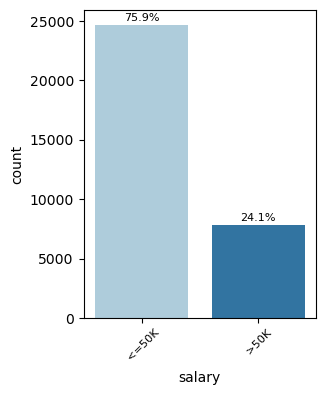

In [33]:
labeled_barplot(data=hq, feature = "salary", perc=True)

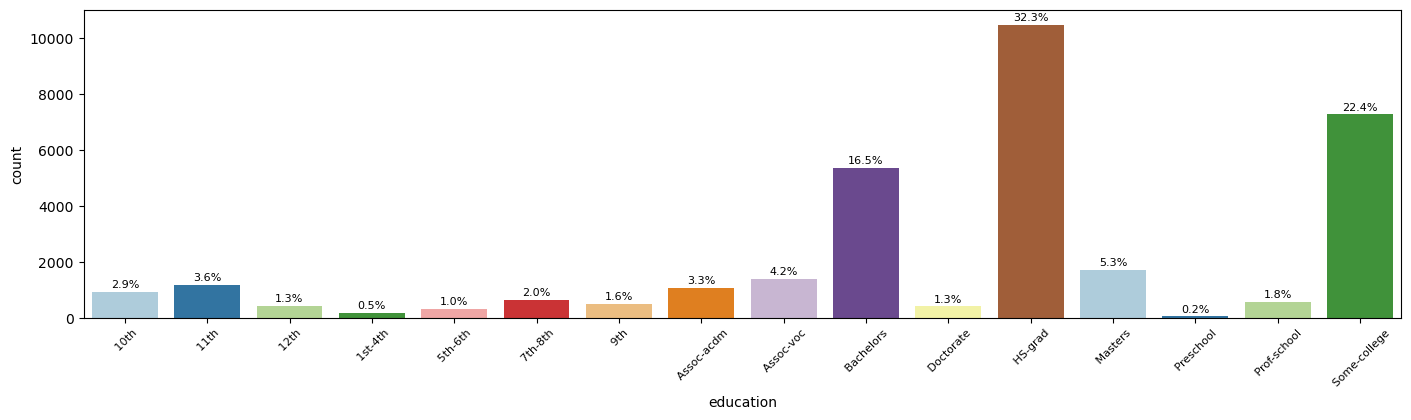

In [34]:
labeled_barplot(data=hq, feature = "education", perc=True)

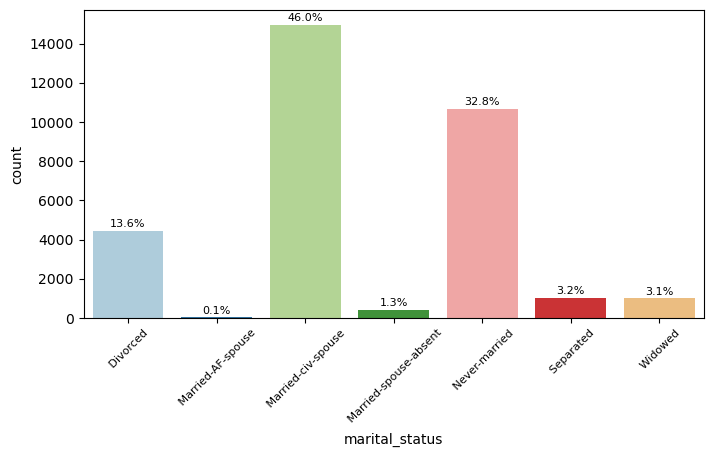

In [35]:
labeled_barplot(data=hq, feature = "marital_status", perc=True)

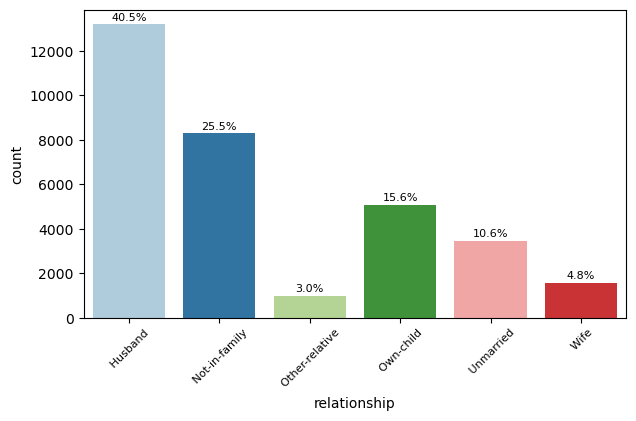

In [36]:
labeled_barplot(data=hq, feature = "relationship", perc=True)

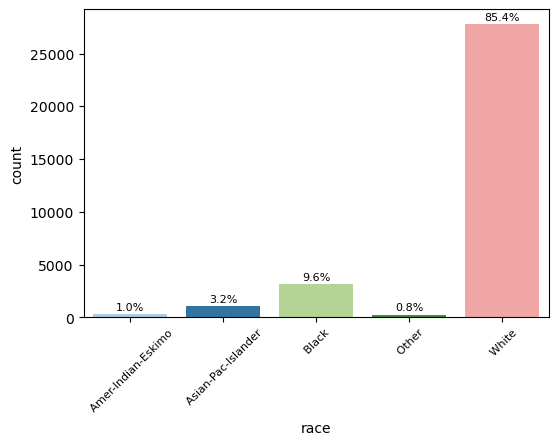

In [37]:
labeled_barplot(data=hq, feature = "race", perc=True)

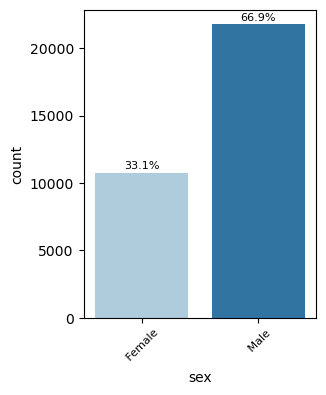

In [38]:
labeled_barplot(data=hq, feature = "sex", perc=True)

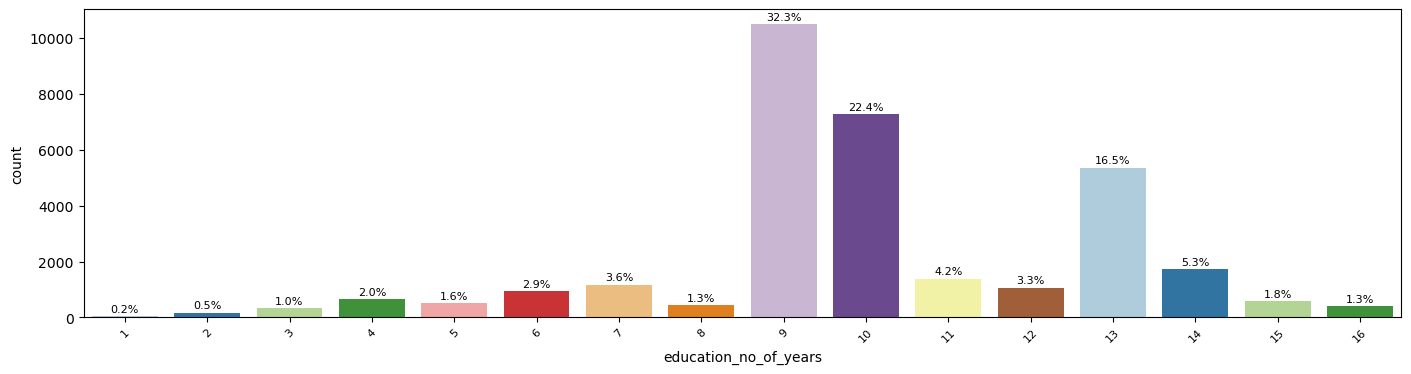

In [39]:
labeled_barplot(data=hq, feature = "education_no_of_years", perc=True)

### Bivariate Analysis  

In [40]:
Num_data = hq.select_dtypes(include = "number")

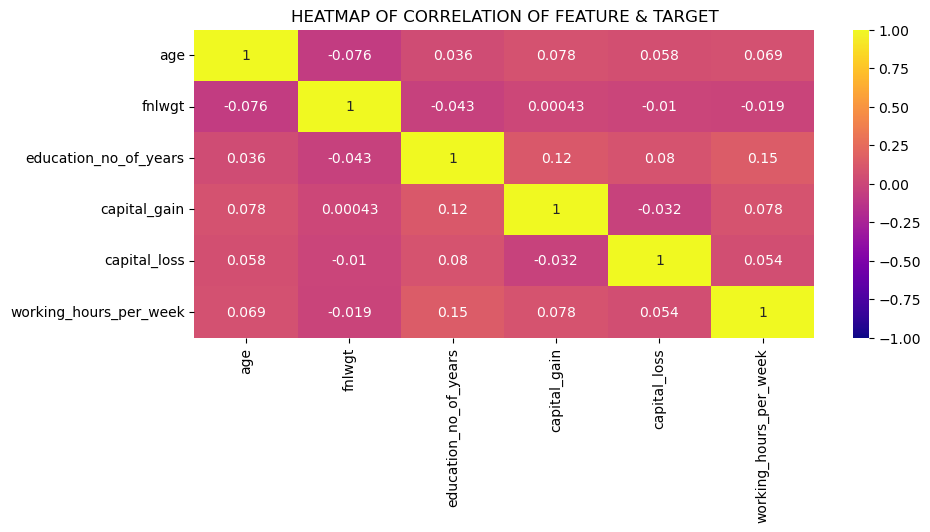

In [41]:
mat_cor = Num_data.corr()
plt.figure(figsize = (10, 4))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = "plasma")
plt.title("HEATMAP OF CORRELATION OF FEATURE & TARGET");

### Scatterplot between two numerical features

In [42]:
def custom_scatterplot(x, y, title, data=hq):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x, y=y, data=hq)
    plt.title(title)
    plt.show()

## AGE VS SALARY

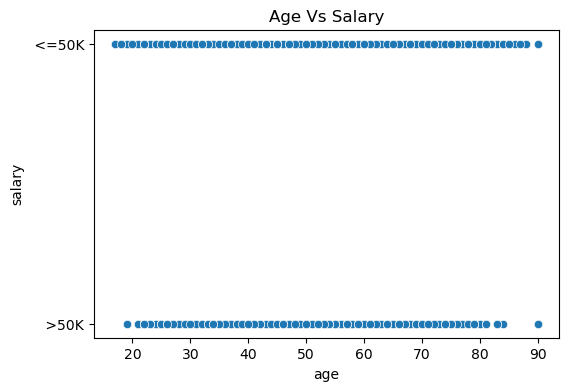

In [43]:
custom_scatterplot(x="age", y="salary", title="Age Vs Salary")

In [44]:
# The plot above indicates that there is an association between the age and salary of an individuals. 
# Hence, age is one the factors that influence the income. 

## EDUCATION VS SALARY

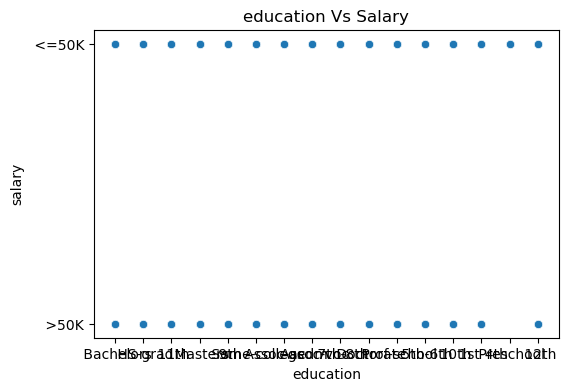

In [45]:
custom_scatterplot(x="education", y="salary", title="education Vs Salary")

In [46]:
# The plot above indicates that there is correlation between the education and salary of an individuals. 
# Hence, education is among the factors that influence the income

### MARTIAL_STATUS VS SALARY

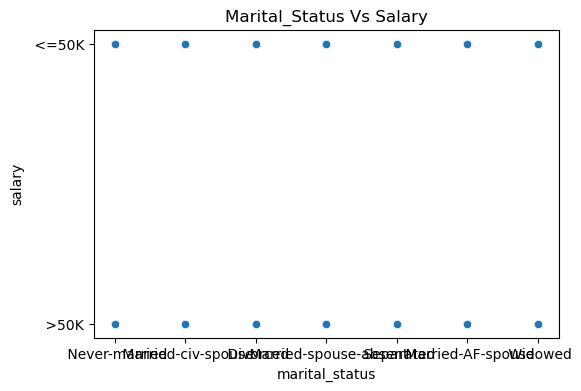

In [47]:
custom_scatterplot(x="marital_status", y="salary", title="Marital_Status Vs Salary")

### RELATIONSHIP VS SALARY

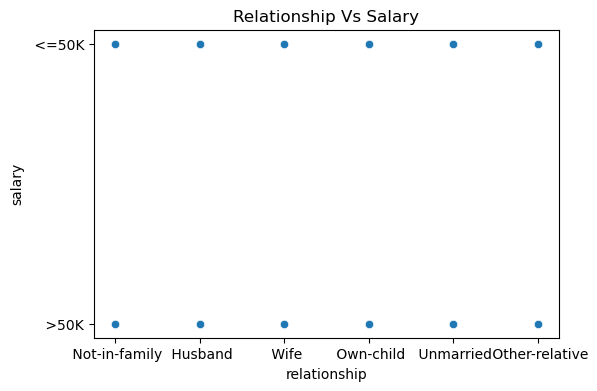

In [48]:
custom_scatterplot(x="relationship", y="salary", title="Relationship Vs Salary")

### SEX VS SALARY

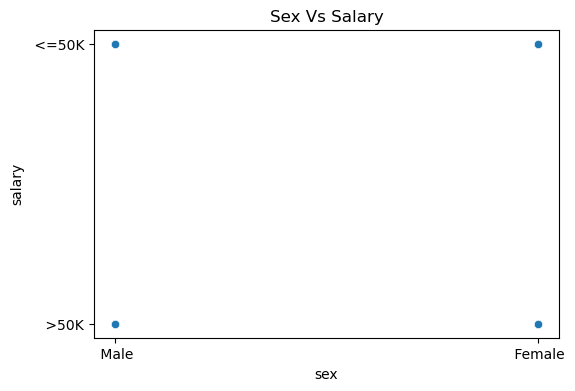

In [49]:
custom_scatterplot(x="sex", y="salary", title="Sex Vs Salary")

### RACE VS SALARY

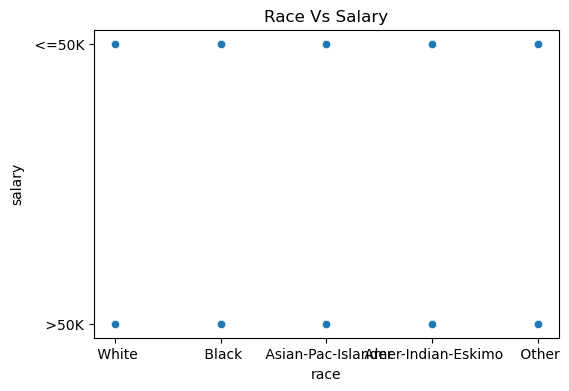

In [50]:
custom_scatterplot(x="race", y="salary", title="Race Vs Salary")

## CAPTIAL_GAIN VS SALARY

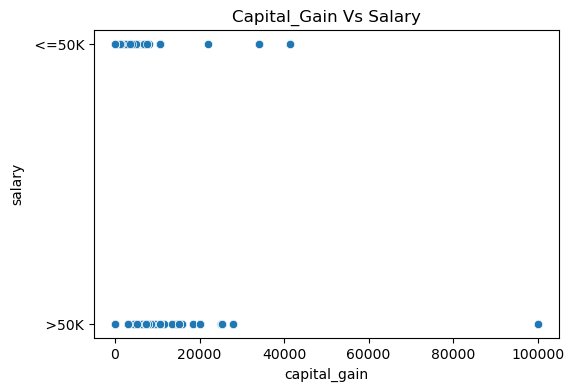

In [51]:
custom_scatterplot(x="capital_gain", y="salary", title="Capital_Gain Vs Salary")

### CAPTIAL_LOSS VS SALARY

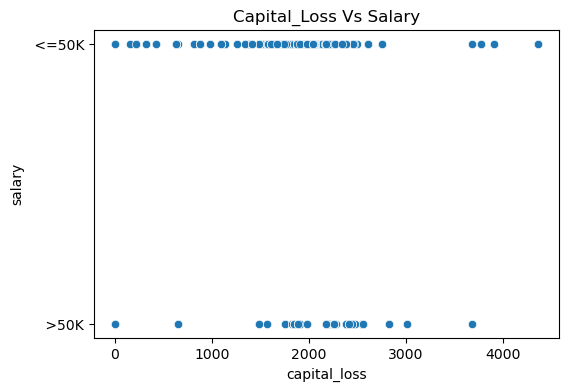

In [52]:
custom_scatterplot(x="capital_loss", y="salary", title="Capital_Loss Vs Salary")

### WORKING_HOURS_PER_WEEK VS SALARY

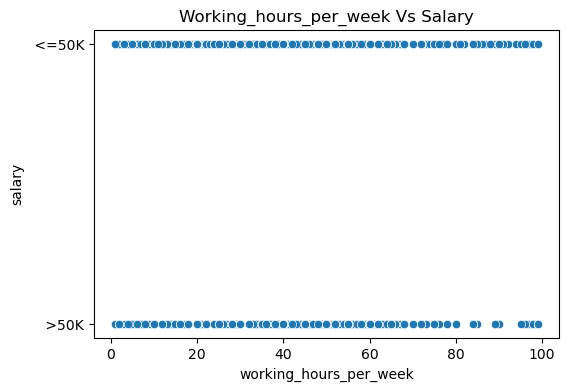

In [53]:
custom_scatterplot(x="working_hours_per_week", y="salary", title="Working_hours_per_week Vs Salary")

### Fnlwgt Vs Salary

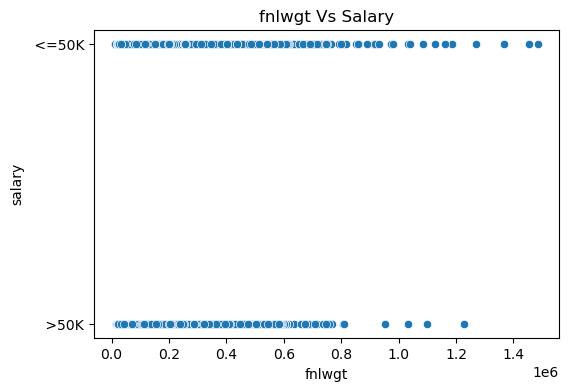

In [54]:
custom_scatterplot(x="fnlwgt", y="salary", title="fnlwgt Vs Salary")

In [55]:
hq["salary"].value_counts(normalize=True)

 <=50K    0.759074
 >50K     0.240926
Name: salary, dtype: float64

In [56]:
# check for correlation
Mat_correl =hq.corr()
Mat_correl

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education_no_of_years,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
working_hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


## MODEL BUILDING

In [57]:
# Import necessary packages

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### To Split the data

In [58]:
# let select our features and Target

x = hq.drop("salary", axis =1)
y = hq["salary"]

In [59]:
# To convert all categorical features to numerical data: OneHotEncoding

x = pd.get_dummies(x, drop_first=True)

In [60]:
x.head

<bound method NDFrame.head of        age  fnlwgt  education_no_of_years  capital_gain  capital_loss  \
0       39   77516                     13          2174             0   
1       50   83311                     13             0             0   
2       38  215646                      9             0             0   
3       53  234721                      7             0             0   
4       28  338409                     13             0             0   
...    ...     ...                    ...           ...           ...   
32532   27  257302                     12             0             0   
32533   40  154374                      9             0             0   
32534   58  151910                      9             0             0   
32535   22  201490                      9             0             0   
32536   52  287927                      9         15024             0   

       working_hours_per_week  workclass_ Federal-gov  workclass_ Local-gov  \
0             

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y)

In [62]:
# let check the split data

y_train.value_counts(normalize=True)

 <=50K    0.759076
 >50K     0.240924
Name: salary, dtype: float64

In [63]:
y_test.value_counts(normalize=True)

 <=50K    0.759066
 >50K     0.240934
Name: salary, dtype: float64

## Logistic Regression

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [65]:
x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

In [66]:
# let build our Mode

from sklearn.linear_model import LogisticRegression

logs_reg = LogisticRegression(random_state=0)

logs_reg.fit(x_train_sd, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [67]:
logs_reg.score(x_train_sd, y_train)

0.8513196818932729

In [68]:
logs_reg.predict_proba(x_test_sd)[:, 1]

array([0.02287706, 0.11440502, 0.2102931 , ..., 0.58609275, 0.02381478,
       0.12209565])

In [69]:

y_train = np.where(y_train == ' <=50K', 0, 1)
y_test = np.where(y_test == ' >50K', 0, 1)

## Model Performance Check

In [70]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, confusion_matrix)

In [71]:
from Utily import model_performance_classification

## Confusion Matrix

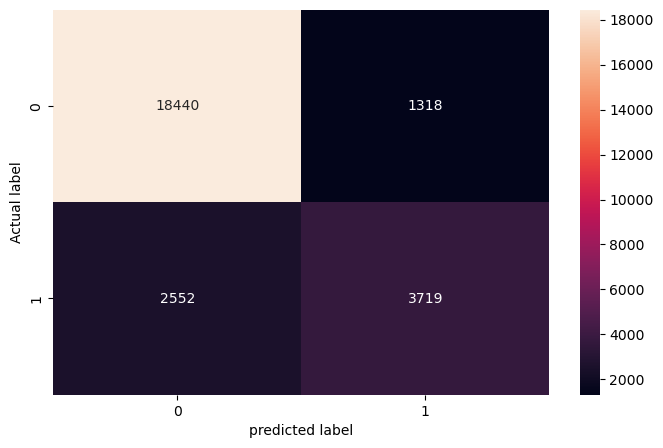

,Accuracy,Recall,Precision,F1_score
0,0.85132,0.593047,0.738336,0.657764


In [72]:
logs_reg_train = model_performance_classification(logs_reg, x_train_sd, y_train)
logs_reg_train

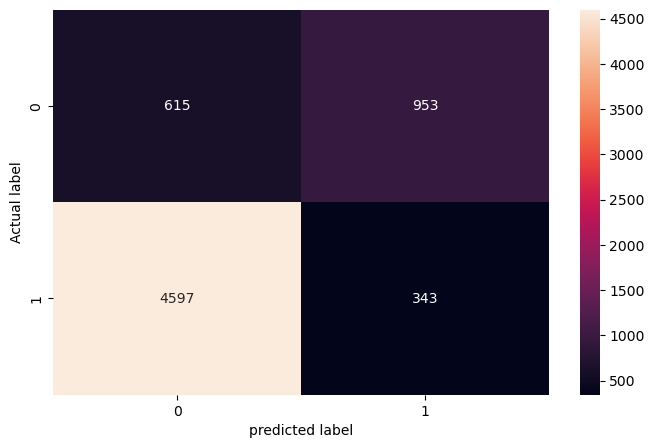

,Accuracy,Recall,Precision,F1_score
0,0.147203,0.069433,0.26466,0.110006


In [73]:
logs_reg_test = model_performance_classification(logs_reg, x_test_sd, y_test)
logs_reg_test

### MODEL IMPROVEMENT

### Balance the Data

In [74]:
from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, SMOTE

In [75]:
over_U = RandomOverSampler(random_state=0)

x_over, y_over = over_U.fit_resample(x, y)

In [76]:
y_over.value_counts(normalize=True)

 <=50K    0.5
 >50K     0.5
Name: salary, dtype: float64

In [77]:
# By using SMOTE

smote = SMOTE(random_state=0)

x_sm, y_sm = over_U.fit_resample(x, y)

In [78]:
y_sm.value_counts(normalize=True)

 <=50K    0.5
 >50K     0.5
Name: salary, dtype: float64

In [79]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.2)

In [80]:
# Normalizing the data

x_train_sm_sd = scaler.fit_transform(x_train_sm)
x_test_sm_sd = scaler.transform(x_test_sm)

In [81]:
logs3_reg = LogisticRegression(random_state=0)

logs3_reg.fit(x_train_sm_sd, y_train_sm)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [82]:
y_train_sm = np.where(y_train_sm == ' <=50K', 0, 1)
y_test_sm = np.where(y_test_sm == ' >50K', 0, 1)

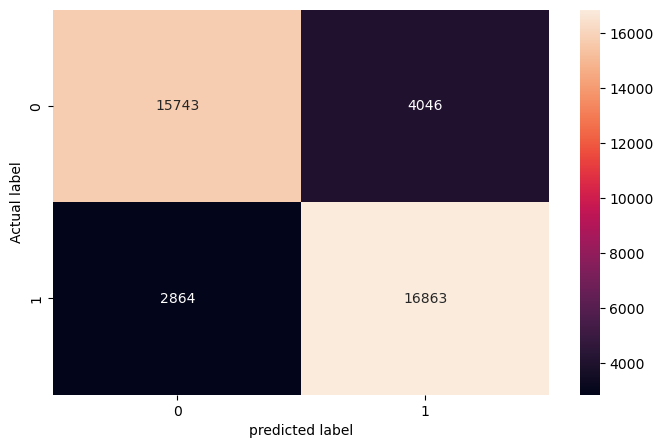

,Accuracy,Recall,Precision,F1_score
0,0.825134,0.854818,0.806495,0.829954


In [83]:
logs3_reg_train = model_performance_classification(logs3_reg, x_train_sm_sd, y_train_sm)
logs3_reg_train

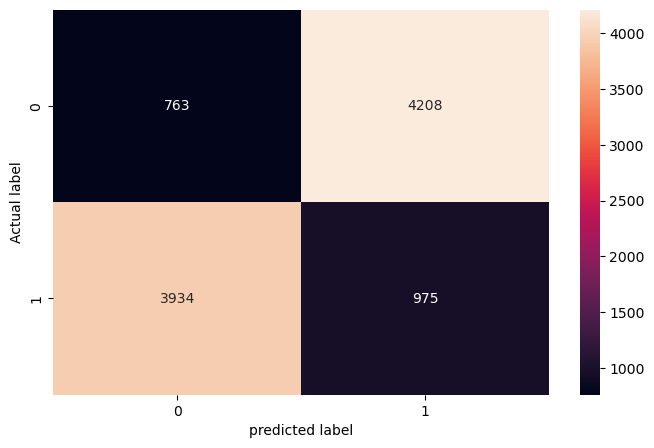

,Accuracy,Recall,Precision,F1_score
0,0.175911,0.198615,0.188115,0.193222


In [84]:
logs3_reg_test = model_performance_classification(logs3_reg, x_test_sm_sd, y_test_sm)
logs3_reg_test